In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

In [2]:
#Obtain data
data = pd.read_csv('/Users/neveh/Desktop/Staphylococcus_aureus_Infection_Data_original.csv')

#dropping the empty values
data = data.dropna() 

#dropping the other targets
data = data.drop(['Unnamed: 0', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death' ], axis=1)

#replacing the age group catergories
data = data.replace('00-10', 0)
data = data.replace('11-20', 1)
data = data.replace('21-30', 2)
data = data.replace('31-40', 3)
data = data.replace('41-50', 4)
data = data.replace('51-60', 5)
data = data.replace('61-70', 6)
data = data.replace('71-80', 7)
data = data.replace('80+', 8)

In [3]:
#Split features and target
X = data.drop('ThirtyDay_Death', axis=1)
y = data['ThirtyDay_Death']

In [4]:
print(f'Percentage of deaths:', round(sum(y)/len(y)*100, 2))

Percentage of deaths: 17.4


In [5]:
#Resample minority class, deaths
ros = RandomOverSampler(random_state=42)

#Fit and transform X_train and y_train
X_resampled, y_resampled = ros.fit_resample(X, y)

#Add the oversampled data with the original data
X_new = pd.concat([X, X_resampled])
y_new = pd.concat([y, y_resampled])

In [6]:
#Selecting the best features
selector = SelectKBest(f_classif, k=20)
X = selector.fit_transform(X, y) #new X with the best features 

C:\Users\neveh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2093 2094] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\neveh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [7]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [8]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL #1

In [9]:
#Define model and train on selected features
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred_test_pen = log_reg.predict(X_test_scaled)
y_pred_train_pen = log_reg.predict(X_train_scaled)

In [10]:
#Generate confusion matrix
cm_pen = confusion_matrix(y_test, y_pred_test_pen)

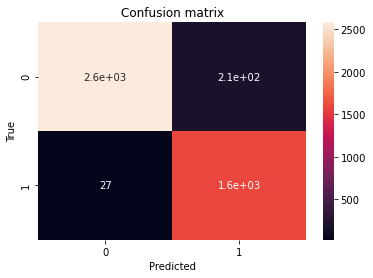

In [11]:
#Show confusion matrix
sns.heatmap(cm_pen, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
#Calculate accuracy
accuracy_test_pen = accuracy_score(y_test, y_pred_test_pen)
accuracy_train_pen = accuracy_score(y_train, y_pred_train_pen)
print('Testing accuracy for SVM model:',accuracy_test_pen)
print('Training accuracy for SVM model:',accuracy_train_pen)

Testing accuracy for SVM model: 0.9465337562301767
Training accuracy for SVM model: 0.9983490336991356


MODEL #2

In [13]:
#Define model
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train) 

y_pred_test_svm = svm.predict(X_test_scaled)
y_pred_train_svm = svm.predict(X_train_scaled)

In [14]:
#Generate comfusion matrix
cm_svm = confusion_matrix(y_test, y_pred_test_svm)

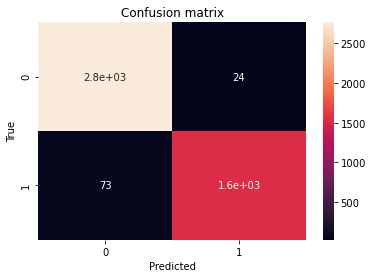

In [15]:
#Show confusion matrix
sns.heatmap(cm_svm, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
#Calculate accuracy
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
print('Testing accuracy for SVM model:',accuracy_test_svm)
print('Training accuracy for SVM model:',accuracy_train_svm)

Testing accuracy for SVM model: 0.9780244676030811
Training accuracy for SVM model: 0.9948528697678936


MODEL #3

In [17]:
#Define model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred_tree = clf.predict(X_test_scaled)

y_pred_test_tree = clf.predict(X_test_scaled)
y_pred_train_tree = clf.predict(X_train_scaled)

In [18]:
#Generate confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_test_tree)

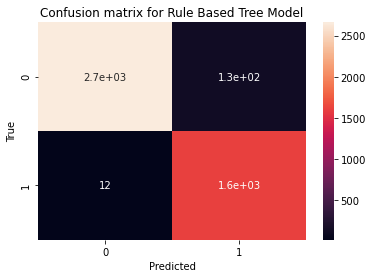

In [19]:
#Show confusion matrix
sns.heatmap(cm_tree, annot=True)
plt.title('Confusion matrix for Rule Based Tree Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
#Calculate accuracy
accuracy_test_tree = accuracy_score(y_test, y_pred_test_tree)
accuracy_train_tree = accuracy_score(y_train, y_pred_train_tree)
print('Testing accuracy for Penalized model:',accuracy_test_tree)
print('Training accuracy for Penalized model:',accuracy_train_tree)

Testing accuracy for Penalized model: 0.9687358405074762
Training accuracy for Penalized model: 1.0
